In [24]:
# import libraries
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra 
import sklearn # machine learning library
from sklearn.linear_model import LinearRegression # linear regression model 
from sklearn.metrics import mean_squared_error # mean squared error
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler # one hot encoder, min max scaler
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization
import warnings
warnings.filterwarnings('ignore')



In [25]:
# Reading the data from a CSV file
df = pd.read_csv('data_concret_charge.csv')

# Dropping any rows with missing values
df = df.dropna()

# Converting the 'time' column to string type
df["time"] = df["time"].astype(str)

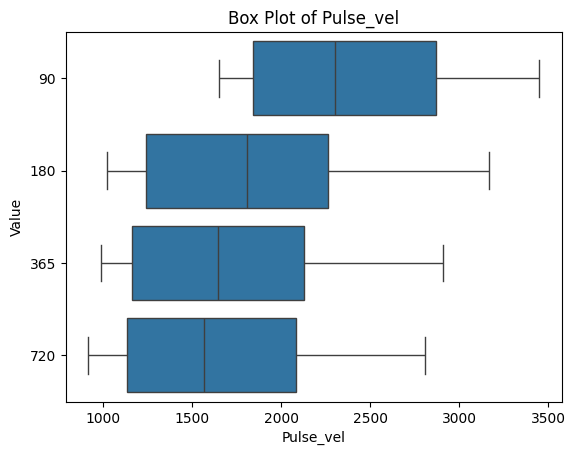

In [26]:

sns.boxplot(data=df, x='charge', y='time') # box plot of charge vs time
plt.xlabel('Pulse_vel') # x-axis label 
plt.ylabel('Value') # `y-axis label`
plt.title('Box Plot of Pulse_vel') # title of the plot
plt.show() # display the plot


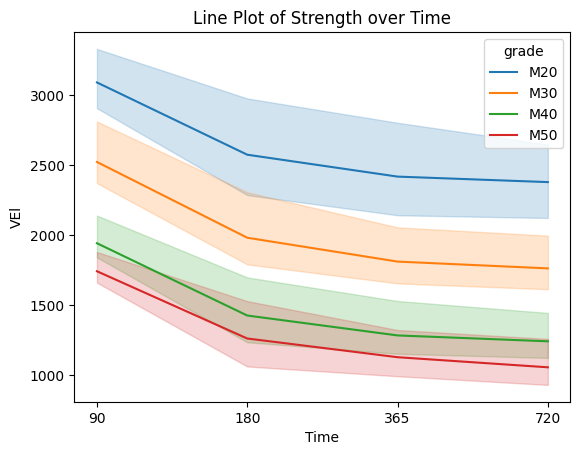

In [27]:
sns.lineplot(data=df, x='time', y='charge', hue='grade') # line plot of charge vs time
plt.xlabel('Time') # x-axis label
plt.ylabel('VEl') # y-axis label
plt.title('Line Plot of charge over Time') # title of the plot
plt.show() # display the plot


In [28]:
df_model = df.copy(deep=True) # create a deep copy of the dataframe
# One-hot encoding "Grade" and "time"
encoder = OneHotEncoder() # create an instance of the one hot encoder
encode = encoder.fit(df_model[['grade', 'time']]) # fit the encoder to the data
encoded_features = encode.transform(df_model[['grade', 'time']]).toarray() # transform the data to the encoder object created above


# Normalizing "Glass Fibre (%)"
scaler = MinMaxScaler() # create a min max scaler
gf_scaled = scaler.fit_transform(df_model[['perc_GF']]) # fit and transform the data to the scaler object created above 

# Preparing the features (X) and target (y)
X = np.concatenate([encoded_features, gf_scaled], axis=1) # concatenate the encoded features and the scaled glass fibre
y_true = df_model['charge'].values # target variable


In [29]:
model_charge = LinearRegression() # create an instance of the linear regression model
model_charge.fit(X, y_true) # fit the model to the data


LinearRegression()

In [30]:
y_pred_charge =  model_charge.predict(X) # predict the target using the model
mse_charge = mean_squared_error(y_pred_charge, y_true)
print(f'Mean Squared Error (VEL): {mse_charge:.2f}')


Mean Squared Error (VEL): 43930.52


In [31]:
def predict_charge(grade,temp, time):
    # Encode the grade and time using the previously defined encoder
    encoded_grade_temp = encode.transform([[grade, temp]]).toarray()

    # Normalize the percentage mix
    normalized_time = scaler.transform([[time]])

    # Prepare the input features
    input_features = np.concatenate([encoded_grade_temp, normalized_time], axis=1)

    # Predict the charges using the trained models
    predicted_charge = (model_charge.predict(input_features)) 
 

    # Return the predicted charges
    return print(f'Predicted charge: {predicted_charge[0]:.2f}')



In [32]:
predict_charge('M50', "90", 0.07)

Predicted charge: 1760.00


In [33]:
from sklearn.metrics import mean_squared_error
import numpy as np

y_pred = model_charge.predict(X)  # Assuming you have already trained the model_charge
rmse = np.sqrt(mean_squared_error(y_pred, y_true))
print(f'RMSE Score: {rmse:.2f}')


RMSE Score: 209.60
